In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [3]:
data = pd.read_csv('E:\\iPython_Notebooks\Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
count = data.Species.value_counts()
count

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [27]:
data.drop('species',axis=1,inplace=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


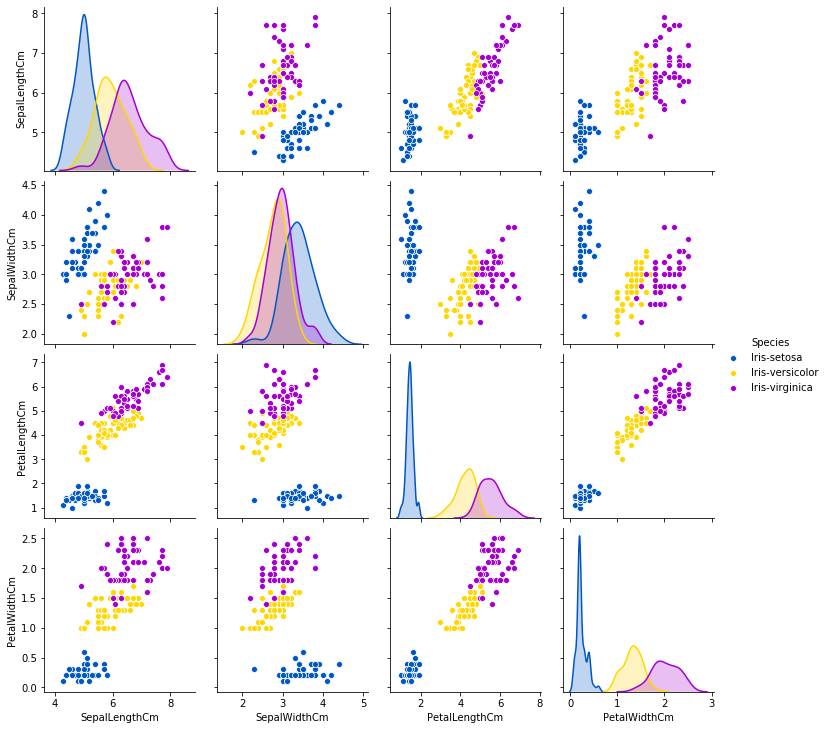

In [28]:
g = sns.pairplot(data.drop('Id', axis = 1), hue="Species", palette='prism');

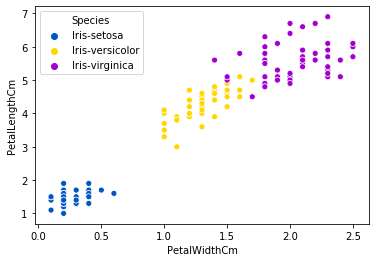

In [29]:
sns.scatterplot(x='PetalWidthCm', y = 'PetalLengthCm', data = data, hue = 'Species', palette='prism');

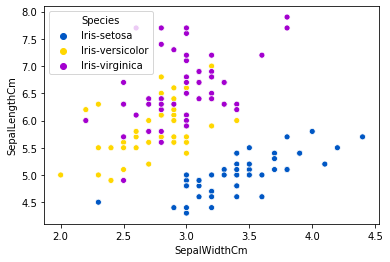

In [30]:
sns.scatterplot(x='SepalWidthCm', y = 'SepalLengthCm', data = data, hue = 'Species', palette='prism');

PetalWidthCm and PetalLengthCm seem to be most relevant features for prediction

In [75]:
y_target = data['Species']
features = ['SepalWidthCm','SepalLengthCm','PetalWidthCm','PetalLengthCm']
X_features = data[features]
X_features.head()

,SepalWidthCm,SepalLengthCm,PetalWidthCm,PetalLengthCm
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test= train_test_split(X_features, y_target, test_size=0.3, random_state = 42)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
model = LogisticRegression()

In [80]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred = model.predict(X_test)

In [89]:
acc=accuracy_score(y_test,y_pred)
print('train accuracy is:',acc*100)

train accuracy is: 100.0


In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
clf = KNeighborsClassifier()

In [85]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
y_pred = clf.predict(X_test)

In [88]:
acc=accuracy_score(y_test,y_pred)
print('test accuracy is:',acc*100)

test accuracy is: 100.0
